In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter("ignore")

from matplotlib import font_manager, rc

# 사용하려는 OTF 폰트의 경로를 지정
font_path = r'C:\Users\User\AppData\Local\Microsoft\Windows\Fonts\NotoSansKR-Regular.otf'

# 폰트 이름을 가져오기
font_name = font_manager.FontProperties(fname=font_path).get_name()

# 폰트 설정
rc('font', family=font_name)

# 2014년에서 2023년 초등학교 총괄
데이터셋 파일 출처: https://stat.eseoul.go.kr/statHtml/statHtml.do?orgId=201&tblId=DT_201004_O130001&conn_path=I2

In [2]:
# 엑셀 파일 경로 설정 (초등학교 관련 데이터)
file_path = '..\excelNgraph_img\Excel\elementary_school_2014to2023.xlsx'

# 엑셀 파일을 pandas 데이터프레임으로 읽어오기
df = pd.read_excel(file_path, engine='openpyxl', header=0)

# 데이터프레임의 상위 5개 행을 출력
df.head()

,시도별(1),설립주체별(1),시점,학급수 (개),학생수 (명),입학자수 (명),졸업자수 (명)
0,서울특별시,계,2014,18854,457517,79656,88172
1,서울특별시,계,2015,18780,450675,75258,78066
2,서울특별시,계,2016,18621,436121,69944,79123
3,서울특별시,계,2017,18625,428333,72529,75440
4,서울특별시,계,2018,18585,424800,70686,67742


In [3]:
# 데이터프레임의 전체 정보 출력 (열의 데이터 타입, 크기 등 확인)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   시도별(1)    10 non-null     object
 1   설립주체별(1)  10 non-null     object
 2   시점        10 non-null     int64 
 3   학급수 (개)   10 non-null     int64 
 4   학생수 (명)   10 non-null     int64 
 5   입학자수 (명)  10 non-null     int64 
 6   졸업자수 (명)  10 non-null     int64 
dtypes: int64(5), object(2)
memory usage: 688.0+ bytes


In [4]:
# '시점'부터 열을 재구성하여 필요한 열들만 선택하고, '시점'을 인덱스로 설정
df_school = df.iloc[:, 2:]
df_school.set_index('시점', inplace=True)

# 컬럼명 변경 (열 이름을 더 명확하게 설정)
col_name = ['학급 수', '학생 수', '입학자 수', '졸업자 수']
df_school.columns = col_name

# 데이터프레임의 상위 5개 행 출력
df_school.head()

,학급 수,학생 수,입학자 수,졸업자 수
시점,,,,
2014,18854,457517,79656,88172
2015,18780,450675,75258,78066
2016,18621,436121,69944,79123
2017,18625,428333,72529,75440
2018,18585,424800,70686,67742


[]

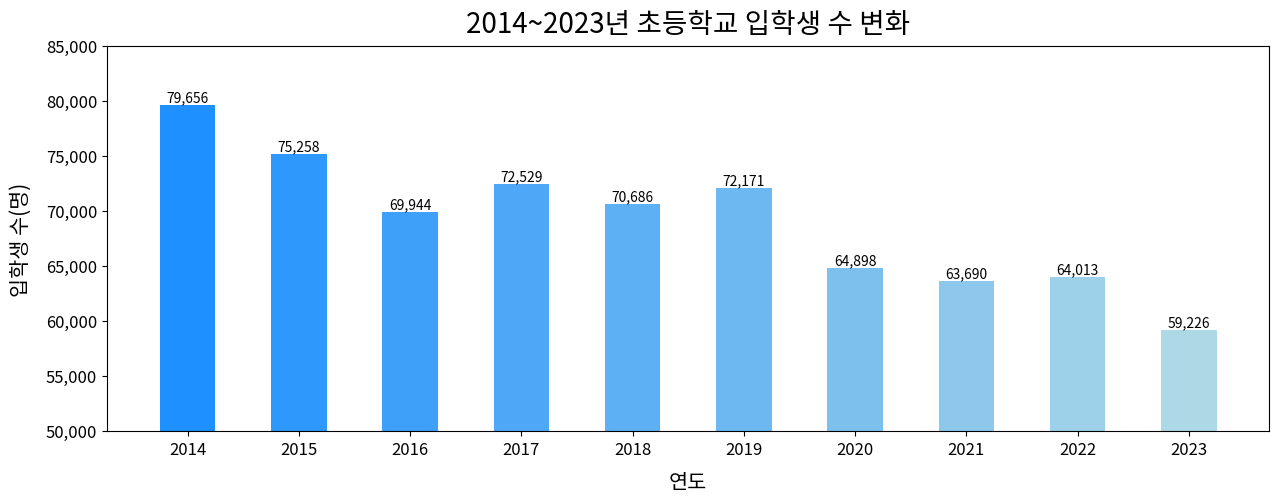

In [5]:
from matplotlib.ticker import FuncFormatter  # y축 값에 천 단위 쉼표 표시를 위한 라이브러리

# 그래프 크기 설정
plt.figure(figsize=(15,5))

# x축: 시점
x = df_school.index.to_list()

# 막대 그래프 너비 설정
bar_width = 0.5

# 색상 설정 (시작과 끝 색상)
start_color = np.array([30,144,255]) / 255  # 파란색
end_color = np.array([173,216,230]) / 255  # 밝은 파란색

# 각 막대의 색상 설정 (점진적으로 변하는 색상)
num_bars = len(x)
colors = [(1 - i / (num_bars - 1)) * start_color + (i / (num_bars - 1)) * end_color for i in range(num_bars)]

# 막대 그래프 생성 ('입학자 수' 기준)
bars = plt.bar(x, df_school['입학자 수'], color=colors, width=bar_width)

# 그래프 제목 설정
plt.title('2014~2023년 초등학교 입학생 수 변화', fontsize=20, pad=10)

# x축 설정
plt.xlabel('연도', labelpad=10, fontsize=15)
plt.xticks(x, fontsize=12)

# y축 설정
plt.ylabel('입학생 수(명)', labelpad=10, fontsize=15)
plt.yticks(fontsize=12)
plt.ylim(50000, 85000)  # y축 범위 설정

# 천 단위 쉼표 추가 함수 정의
def comma(x, pos):
    return f'{int(x):,}'

# y축 값에 천 단위 쉼표 추가
plt.gca().yaxis.set_major_formatter(FuncFormatter(comma))

# 막대 그래프 위에 값 표시
for bar in bars:
    y_val = bar.get_height()  # 각 막대의 높이
    plt.text(bar.get_x() + bar.get_width() / 2, y_val, format(int(y_val), ','), ha='center', va='bottom', fontsize=10)

# 그래프 출력
plt.plot()

# 학급 당 학생 수

In [6]:
# 학급 당 학생 수 계산 (전체 학생 수를 학급 수로 나눔) 및 소수점 둘째 자리에서 반올림
df_school['학급 당 학생 수'] = round(df_school['학생 수'] / df_school['학급 수'], 2)

# '학급 당 학생 수' 데이터만 따로 저장
df_ratio = df_school[['학급 당 학생 수']]

# 데이터프레임의 상위 5개 행 출력
df_ratio.head()

,학급 당 학생 수
시점,
2014,24.27
2015,24.00
2016,23.42
2017,23.00
2018,22.86


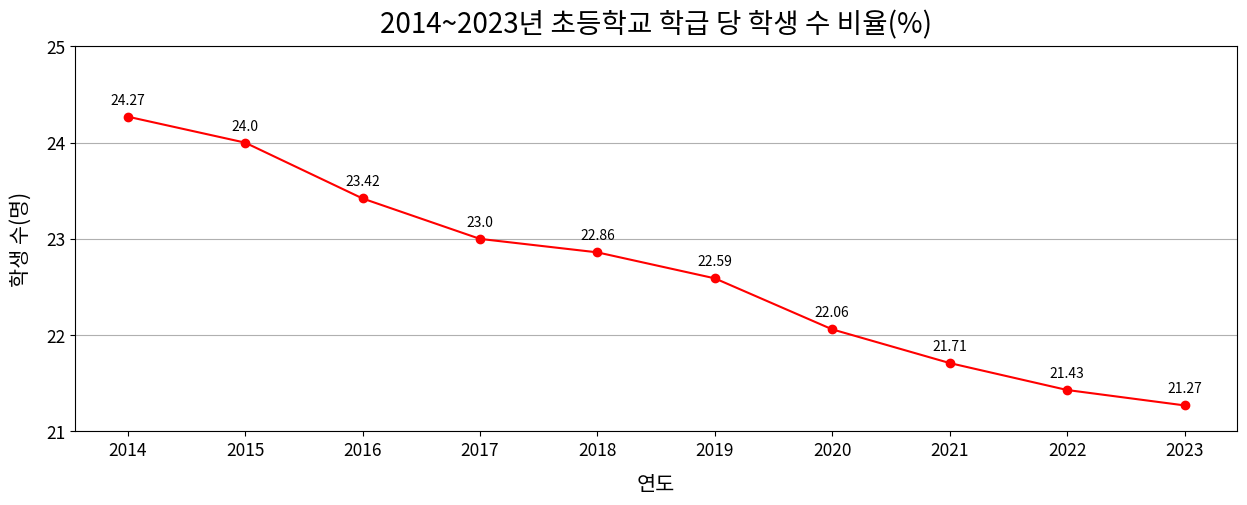

In [7]:
# 그래프 크기 설정
plt.figure(figsize=(15,5))

# 가로선만 그리드 표시
plt.grid(axis='y')

# x축: 시점 리스트
x = df_ratio.index.to_list()

# '학급 당 학생 수' 선 그래프 생성
plt.plot(df_ratio, color='red', marker='o')

# 그래프 위에 각 데이터 값 추가
for i, txt in enumerate(df_ratio['학급 당 학생 수']):
    plt.text(x[i], txt+0.1, f'{txt}', ha='center', va='bottom', fontsize=10)

# 그래프 제목 설정
plt.title('2014~2023년 초등학교 학급 당 학생 수 비율(%)', pad=10, fontsize=20)

# x축과 y축 레이블 설정
plt.xlabel('연도', labelpad=10, fontsize=15)
plt.xticks(x, fontsize=12.5)
plt.ylabel('학생 수(명)', labelpad=10, fontsize=15)

# y축 눈금 설정 (범위 및 단위 설정)
plt.yticks(range(21, 26), fontsize=12.5)

# 그래프 출력
plt.show()

KeyError: '입학자 수'

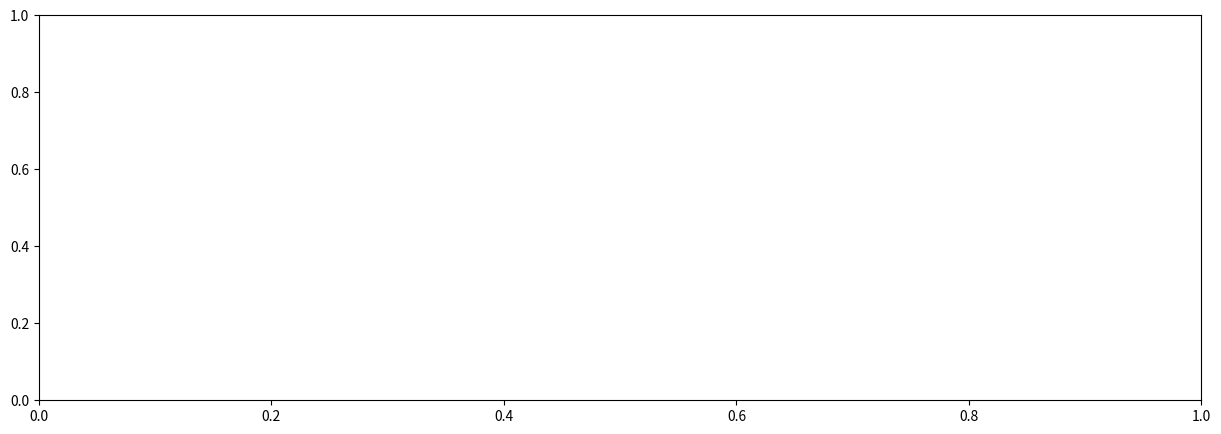

In [8]:
# 그래프 크기 설정
fig, ax1 = plt.subplots(figsize=(15, 5))

# x축: 시점 리스트
x = df.index.to_list()

# 막대 그래프 너비 설정
bar_width = 0.5

# 색상 설정 (시작과 끝 색상)
start_color = np.array([30, 144, 255]) / 255  # 파란색
end_color = np.array([173, 216, 230]) / 255  # 밝은 파란색

# 각 막대의 색상 설정 (점진적으로 변하는 색상)
num_bars = len(x)
colors = [(1 - i / (num_bars - 1)) * start_color + (i / (num_bars - 1)) * end_color for i in range(num_bars)]

# 막대 그래프 생성 ('입학자 수' 기준)
bars = ax1.bar(x, df['입학자 수'], color=colors, width=bar_width)

# 그래프 제목 설정
plt.title('2014~2023년 초등학교 입학생 수 및 학급 당 학생 수 비율(%)', fontsize=20, pad=10)

# x축 설정
ax1.set_xlabel('연도', labelpad=10, fontsize=15)
ax1.set_xticks(x)
ax1.set_xticklabels(x, fontsize=12)

# 첫 번째 y축 설정 (입학생 수)
ax1.set_ylabel('입학생 수(명)', labelpad=10, fontsize=15)
ax1.set_ylim(50000, 85000)

# y축에 천 단위 쉼표 추가
ax1.yaxis.set_major_formatter(FuncFormatter(lambda x, pos: f'{int(x):,}'))

# 막대 그래프 위에 값 표시
for bar in bars:
    y_val = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width() / 2, y_val, format(int(y_val), ','), ha='center', va='bottom', fontsize=10)

# 이중 y축 생성 (학급 당 학생 수 비율 그래프)
ax2 = ax1.twinx()

# '학급 당 학생 수' 꺾은선 그래프 생성
ax2.plot(x, df_ratio['학급 당 학생 수'], color='red', marker='o')

# 꺾은선 그래프 위에 값 표시
for i, txt in enumerate(df_ratio['학급 당 학생 수']):
    ax2.text(x[i], txt + 0.1, f'{txt}', ha='center', va='bottom', fontsize=10)

# 두 번째 y축 설정 (학급 당 학생 수)
ax2.set_ylabel('학급 당 학생 수(명)', labelpad=10, fontsize=15)
ax2.set_ylim(20, 28)
ax2.set_yticks(range(20, 29, 2))

# y축 눈금 크기 설정
ax2.tick_params(axis='y', labelsize=12.5)

# 그래프 출력
plt.show()

### 주요 분석 내용

**1. 입학생 수 지속 감소**<br>
2014년부터 2023년까지 입학생 수는 지속적으로 감소하는 추세이다. 2014년에는 79,656명이었지만, 2023년에는 59,226명으로 약 20,000명가량 감소했다. 이는 약 25% 감소한 수치로, 서울 내 초등학교 입학생 수가 큰 폭으로 줄어들고 있음을 보여준다.<br>

**2. 학급당 학생 수 비율 감소**<br>
그래프에 표시된 '학급당 학생 수 비율(빨간선)'은 2014년 24.26명에서 2023년 21.27명으로 감소했다. 학급당 학생 수가 줄어들고 있으며, 더 작은 규모의 학급 운영이 이루어지고 있다는 것을 확인할 수 있다.<br>

**3. 2017년 이후 입학생 수 감소 폭 확대**<br>
입학생 수는 2017년 이후 더욱 빠르게 감소하고 있다. 2017년 72,529명이던 입학생 수는 2020년 64,898명으로, 3년간 약 7,631명으로 줄어들었다. 그 이후에도 감소는 계속되어 2023년에는 59,226명으로 급격히 감소했다.<br>

**4. 입학생 수와 학급당 학생 수의 상관관계**<br>
입학생 수가 감소하면서 학급당 학생 수도 함께 감소하는 경향을 보인다. 입학생 수가 줄어들면 학급당 학생 수가 자연스럽게 줄어들 수밖에 없는데, 서울의 전체 학급 규모가 조정되고 있음을 의미할 수 있다. 그러나 입학생 수에 비해 학급당 학생 수의 감소는 상대적으로 완만한 편이므로, 전체 학급 수는 입학생 수 감소에 비례해 급격히 줄어들지 않고 있다. <br>
